# Introducción

<font color=green>
Después de haber trabajado con SQL y haber extraído la información necesaria, podremos seguir trabajando los 3 datasets con Python. 
</font>

## Objetivos

<font color=green>
    
- Importar los archivos
- Estudiar los datos que contienen
- Asegurarte de que los tipos de datos sean correctos
- Identificar los 10 principales barrios en términos de finalización del recorrido
- Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- Sacar conclusiones basadas en cada gráfico y explicar los resultados
</font>

## Comprobar la hipotesis
<font color=green>
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".    
</font>


# Librerías

In [3]:
#Cargamos las librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

# IMPORTAR LOS DATOS

In [9]:
#Importamos los datos
try:
    data_1 = pd.read_csv('moved_project_sql_result_01.csv')
except:
    data_1 = pd.read_csv('/datasets/project_sql_result_01.csv')
    
try:
    data_4 = pd.read_csv('moved_project_sql_result_04.csv')
except:
    data_4 = pd.read_csv('/datasets/project_sql_result_04.csv')
    
try:
    data_7 = pd.read_csv('moved_project_sql_result_07.csv')
except:
    data_7 = pd.read_csv('/datasets/project_sql_result_07.csv')   
    

# Estudiar los datos

### Datos de data_1

In [10]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [11]:
data_1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [12]:
data_1.tail()

,company_name,trips_amount
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3
63,3556 - 36214 RC Andrews Cab,2


<font color=green>
En data_1 observamos lo siguiente:

- Consta de 2 columnas (`company_name` y `trips_amount`) y 64 filas.
- No tiene valores faltantes.
- Los tipos de datos se ven correctos.

No es necesario corregir algo.    
</font>

### Datos de data_4

In [13]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [14]:
data_4.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [15]:
data_4.tail()

,dropoff_location_name,average_trips
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538
93,Riverdale,1.800000


<font color=green>
En data_4 observamos lo siguiente:

- Tiene 2 columnas (`dropoff_location_name` y `average_trips`) y 94 filas.
- No observamos valores faltantes.
- Tipos de datos se ven correctos.

No es necesario corregir algo.
    
</font>

### Datos de data_7

In [16]:
data_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [17]:
data_7.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [18]:
data_7.tail()

,start_ts,weather_conditions,duration_seconds
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0
1067,2017-11-04 16:00:00,Bad,2834.0


<font color=green>
En data_7 observamos lo siguiente:
    
- Cuenta con 3 columnas (`start_ts`, `weather_conditions` y `duration_seconds`)  y 1068 filas.
- No observamos valores faltantes.
- El tipo de dato en la columna start_ts habrá que cambiarlo de object a Datetime.  
</font>

### Corrección de Datos

In [19]:
data_7['start_ts'] = pd.to_datetime(data_7['start_ts'], format='%Y-%m-%d %H:%M:%S')
#Verifiquemos si quedó efectuado el cambio
data_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


## Identificar destinos principales de recorridos 

<font color=green>
Identificaremos los 10 principales barrios en términos de finalización del recorrido.
</font>    

In [22]:
data_4.sort_values('average_trips', ascending = False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


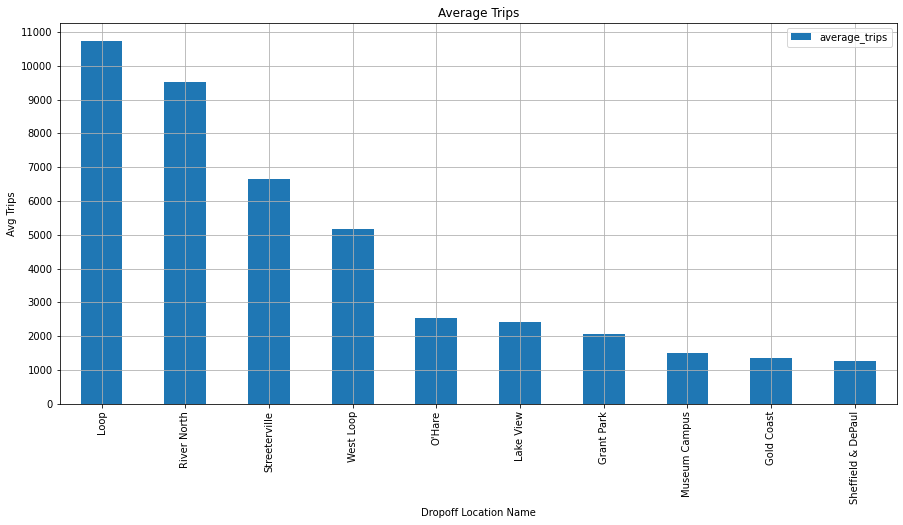

In [23]:
label = data_4.sort_values('average_trips', ascending=False)['dropoff_location_name'].loc[0:9]

data_4.sort_values('average_trips', ascending=False).loc[0:9,:].plot(kind='bar', figsize=(15,7), grid=True)
plt.xticks(range(0,10,1), label)
plt.yticks(range(0,11001,1000))
plt.title('Average Trips')
plt.ylabel('Avg Trips')
plt.xlabel('Dropoff Location Name')
plt.show()

<font color=green>
Los primeros 4 destinos, parecen concentrar la gran mayoría. Siendo los dos más populares Loop y River North.
El 80 de los destinos restantes cuenta con una promedio de viajes inferiores a 1000.
</font>  

### Número de viajes por compañía

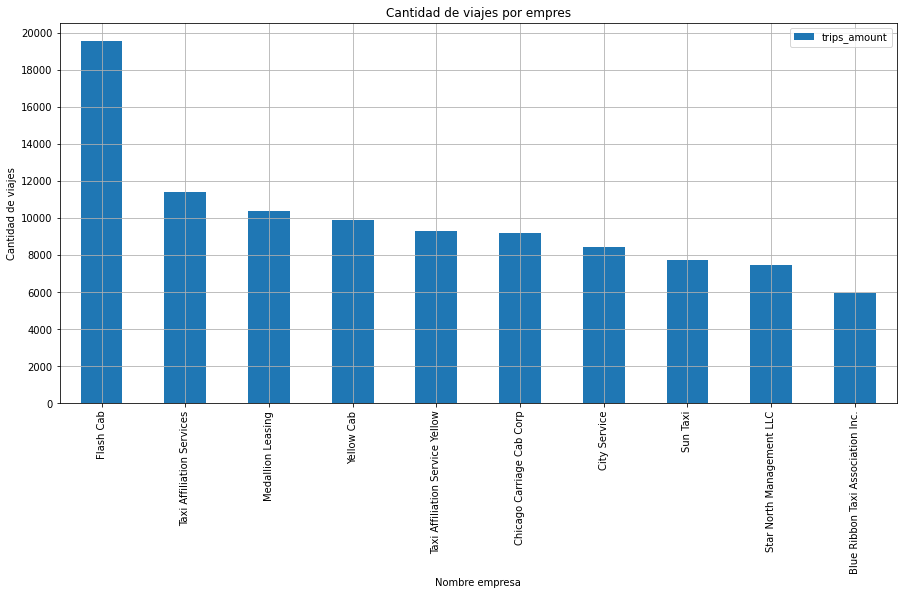

In [24]:
label2 = data_1['company_name'].loc[0:9]

data_1.loc[0:9].plot(kind='bar', grid=True, figsize=(15,7))
plt.xticks(range(0,10,1), label2)
plt.yticks(range(0,20001,2000))
plt.title('Cantidad de viajes por empres')
plt.ylabel('Cantidad de viajes')
plt.xlabel('Nombre empresa')
plt.show()

<font color=green>
Flash Cab es claramente la empresa con más viajes hecho, con casi 20 mil viajes. Le sigue Taxi Affiliation Services con casi 12 mil viajes (un poco más de la mitad de Flash Cab). Mientras que las otras empresas están más parejas y varían entre 11 mil y 6 mil viajes. 
</font> 

### Antes de probar la hipótesis, veamos la distribución de duración del viaje según el tiempo

In [28]:
#Veamos la tabla según el clima meteorológico y la duración media
pd.pivot_table(data_7, values='duration_seconds', index='weather_conditions', aggfunc='mean')

,duration_seconds
weather_conditions,
Bad,2427.205556
Good,1999.675676


<font color=green>
Por la pequeña tabla creada, observamos que el promedio de la duración del viaje en condiciones mala, supera al promedio en buenas condiciones. Sigamos desglozando la información, pero por cada condición meteoróliga.
</font> 

In [32]:
#Dividimos el DataFrame en buena condición meteorológica
good_weather = data_7[data_7['weather_conditions']=='Good']
good_weather.describe()

,duration_seconds
count,888.000000
mean,1999.675676
std,759.198268
min,0.000000
25%,1389.750000
50%,1800.000000
75%,2460.000000
max,7440.000000


<font color=green>
En buena condición meteorológica, tenemos el mismo promedio indicado anteriormente y una mediana de 1800 segundos. Con una máxima de 7440 segundos.
</font> 

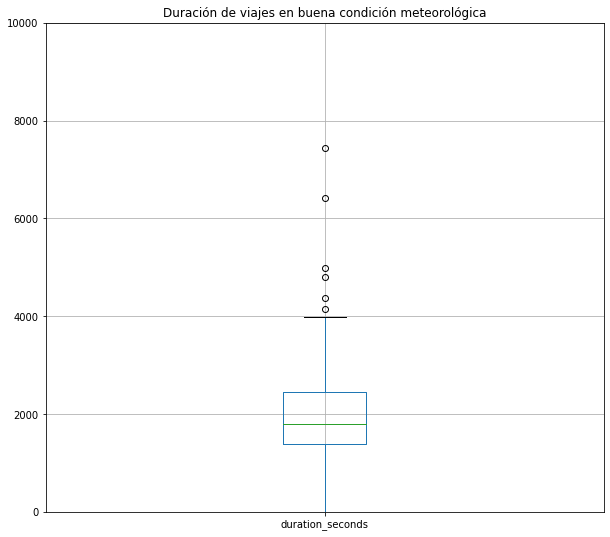

In [34]:
#Creamos un boxplot con el clima bueno
good_weather.boxplot(figsize= (10,9))

plt.ylim(0, 10000)
plt.title('Duración de viajes en buena condición meteorológica')
plt.show()

<font color=green>
Observamos algunos valores atípicos que son pocos valores, con un máximo de 7440 segundos.
</font> 

In [31]:
#Dividimos el DataFrame en mala condición meteorológica
bad_weather = data_7[data_7['weather_conditions']=='Bad']
bad_weather.describe()

,duration_seconds
count,180.000000
mean,2427.205556
std,721.314138
min,480.000000
25%,1962.000000
50%,2540.000000
75%,2928.000000
max,4980.000000


<font color=green>
En malas condiciones meteorológicas, observamos un promedio de 2427 segundos, con una mediana de 2540 segundos. Un máximo de 4980 segundos y un mínimo de 721 segundos.
</font> 

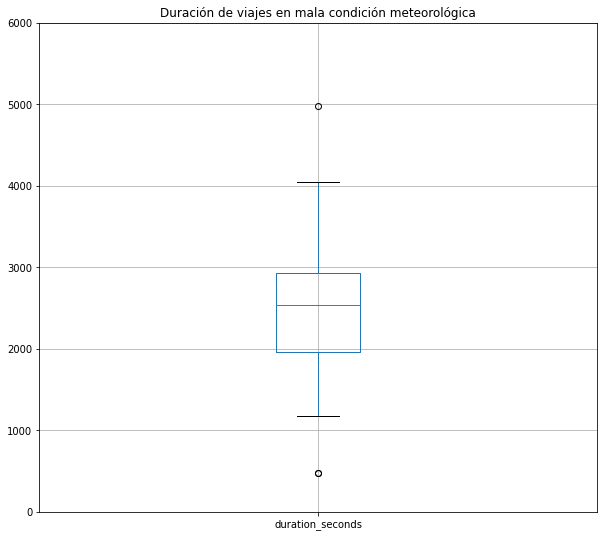

In [35]:
bad_weather.boxplot(figsize= (10,9))

plt.ylim(0, 6000)
plt.title('Duración de viajes en mala condición meteorológica')
plt.show()

<font color=green>
Observando el boxplot, observamos solamente 2 valores atípicos, el de 4980 segundos y el de 721 segundos. Podríamos eliminarlos, pero como es poca la cantidad, los dejaremos
</font> 

# Prueba de Hipotesis

<font color=green>
A continuación probaremos la hipotesis:
    
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"
    
Tomando en cuenta lo siguiente:

- H0 = La duración promedio de los viajes con sábados lluviosos NO cambia.
- H1 = La duración promedio de los vaijes con sábados lluviosos cambia.


</font> 

In [16]:
#Definimos nuestro valor Alpha
alpha = 0.05

#Fijamos el valor por el cual compararemos
value = data_7['duration_seconds'].mean()

#Realizemos el ttest
result = st.ttest_1samp(bad_weather['duration_seconds'], value)
print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Rechazamos la hipótesis nula.')
else:
    print('No rechazamos la hipótesis nula.')





p-value: 4.224120813822628e-10
Rechazamos la hipótesis nula.


# Conclusión

<font color=green>
Para el estudio nos entregaron 3 tablas. La tabla de company_trips, la tabla dropoff y trips_to_airport. No tuvimos datos faltantes en ninguna de las 3 tablas, solamente en la última tabla que tuvimos cambiar el tipo de dato de la columna start_ts a formato DateTime.
    
De las tablas pudimos rescatar la siguiente conclusión:

- Los 10 principales barrios en términos de finalización del recorrido correspondiendo a:

    Loop
    River North
    Streeterville
    West Loop
    O'Hare
    Lake View
    Grant Park
    Museum Campus
    Gold Coast
    Sheffield & DePaul
    
Ordenamos los nombres de mayor a menor según su cantidad de viajes promedios.

Respecto a las empresas de servicios, pudimos constatar que la mayoría realiza menos de 6000 viajes en los días estudiados (15 y 16 de noviembre de 2017), siendo Flash Cab la compañía con más viajes (casi 20.000) seguido por Taxi Affiliation Services con casi 12.000 viajes.

Por último, revisamos nuestra hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Para comprobar esta hipótesis, creamos la hipotesis nula: "La duración promedio de los viajes con sábados lluviosos NO cambia". Pero según nuestro estudio, se rechaza la hipotesis nula. O sea, la duración promedio de los viajes con mal clima, `SI` toman un mayor tiempo.

</font> 





